In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
cwd = fr"C:\Users\juanb\Documents\BAVARIA\Data"

In [3]:
df_venta = pd.read_csv(fr"{cwd}\Input2_clientes_venta.csv", sep = ";")

In [4]:
df_venta["Fecha"] = pd.to_datetime(df_venta["Año"].astype(str) + df_venta["Mes"].map('{:02d}'.format), format="%Y%m")
df_venta

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Fecha
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,2019-05-01
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,2019-05-01
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,2019-05-01
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,2019-05-01
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,2020-08-01
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-07-01
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,2020-07-01
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-09-01


In [5]:
df_clientes = pd.read_csv(fr"{cwd}\Input1_clientes_estructura.csv", sep = ";")
df_clientes

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...
20916,20917,Regional 1,Gerencia_1,Subcanal_31,Categoria_2,0
20917,20918,Regional 1,Gerencia_4,Subcanal_31,Categoria_1,0
20918,20919,Regional 1,Gerencia_9,Subcanal_31,Categoria_1,0
20919,20920,Regional 1,Gerencia_10,Subcanal_31,Categoria_1,0


In [195]:
df_test = pd.read_csv(fr"{cwd}\Input3_clientes_test_4.csv", sep = ";")
df_test

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,0.390000,0.422045,0.528871,0.620000,0.610000
1,12,0.230000,0.750508,0.545422,0.120000,0.030000
2,14,0.680000,0.178546,0.553130,0.060000,0.060000
3,15,0.920000,0.178047,0.302522,0.300000,0.330000
4,18,0.480000,0.216901,0.303468,0.090000,0.180000
...,...,...,...,...,...,...
9297,20186,0.030000,0.147069,0.159453,0.630000,0.590000
9298,20261,0.170000,0.049379,0.046851,0.900000,0.900000
9299,20309,0.059163,0.152190,0.085601,0.489594,0.418825
9300,20360,0.120000,0.033512,0.065089,0.880000,0.980000


## Producto 1

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score
import xgboost as xgb

In [192]:
df_prod_t = pd.read_pickle("df_prod1_t.pkl")
df_prod_t = pd.get_dummies(df_prod_t)
df_prod_t

,disc_ProdOt31,Volumen_ProdOt68,Volumen_ProdOt7,disc_ProdOt39,nr_ProdInno2,nr_ProdOt19,nr_ProdOt78,disc_Prod1,disc_ProdOt22,nr_ProdOt40,...,Gerencia2_Gerencia_2,Gerencia2_Gerencia_3,Gerencia2_Gerencia_4,Gerencia2_Gerencia_5,Gerencia2_Gerencia_6,Gerencia2_Gerencia_7,Gerencia2_Gerencia_8,Gerencia2_Gerencia_9,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.021734,0.0,0.0,0.0,0.0,0.0,0.0,57.546765,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20917,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
20918,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,0
20919,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,1,1,0


In [81]:
df_prod = pd.read_pickle("df_prod1.pkl")
df_prod

,Prod1,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt83,nr_ProdOt84,nr_ProdOt85,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93,nr_ProdOt96
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,Gerencia_3,Subcanal_1,Categoria_2,1,0.0,0.0,0.000000,0.136927,0.019561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,Gerencia_1,Subcanal_3,Categoria_1,1,0.0,0.0,0.004676,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4539,0.0,Gerencia_10,Subcanal_3,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4536,0.0,Gerencia_10,Subcanal_3,Categoria_2,1,0.0,0.0,0.000000,0.078244,0.039122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11769,0.0,Gerencia_3,Subcanal_3,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,Gerencia_1,Subcanal_10,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19714,0.0,Gerencia_1,Subcanal_8,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19702,0.0,Gerencia_3,Subcanal_21,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
df_pd = pd.get_dummies(df_prod) #df_prod.copy()
df_pd

,Prod1,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.000000,0.136927,0.019561,0.130933,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
5843,0.0,0.0,0.0,0.004676,0.000000,0.000000,0.000000,0.056694,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4536,0.0,0.0,0.0,0.000000,0.078244,0.039122,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
11769,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
19714,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
19702,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [199]:
df_c = df_pd[df_pd.index.isin(df_test["Cliente"])].copy()
df_c

,Prod1,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.000000,0.0,0.000000,0.136927,0.019561,0.130933,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,1
4539,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,1,0
4546,1.0,0.000000,0.0,0.056114,0.019561,0.000000,0.467619,0.184255,0.0,0.086938,...,0,0,0,0,1,0,0,0,0,1
3092,0.0,0.033721,0.0,0.000000,0.000000,0.000000,0.000000,0.056694,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,1
4535,0.0,0.000000,0.0,0.000000,0.039122,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0
18878,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,1,0
18996,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1,0,0,0,1,0,0,0,1,0


In [150]:
subc_mapper_clf = df_c.groupby(["SubCanal2"])["Prod1"].mean().to_dict() 
ger_mapper_clf = df_c.groupby(["Gerencia2"])["Prod1"].mean().to_dict() 
cat_mapper_clf = df_c.groupby(["Categoria"])["Prod1"].mean().to_dict() 

In [151]:
df_c["SubCanal2"] = df_c["SubCanal2"].map(subc_mapper_clf)
df_c["Gerencia2"] = df_c["Gerencia2"].map(ger_mapper_clf)
df_c["Categoria"] = df_c["Categoria"].map(cat_mapper_clf)

In [152]:
df_true = df_pd[df_pd["Prod1"] == 1]
df_false = df_pd[df_pd["Prod1"] == 0]

In [153]:
df_false = df_false.sample(n=df_true.shape[0]*2)

In [154]:
df_resampled =df_true.append(df_false).sample(frac = 1).copy() 
df_resampled

,Prod1,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt83,nr_ProdOt84,nr_ProdOt85,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93,nr_ProdOt96
Cliente,,,,,,,,,,,,,,,,,,,,,
7519,0.0,Gerencia_7,Subcanal_18,Categoria_3,1,0.000000,0.0,0.000000,0.088024,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
17797,1.0,Gerencia_4,Subcanal_3,Categoria_3,0,0.033721,0.0,0.044424,0.000000,0.019561,...,0.0,0.0,0.0,0.0,0.0,530.381902,0.0,0.0,0.0,0.0
12506,0.0,Gerencia_10,Subcanal_3,Categoria_3,0,0.000000,0.0,0.037410,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,371.181979,0.0,0.0,0.0,0.0
5746,0.0,Gerencia_1,Subcanal_1,Categoria_2,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4173,0.0,Gerencia_10,Subcanal_2,Categoria_3,1,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,1.0,Gerencia_10,Subcanal_5,Categoria_2,0,0.050582,0.0,0.018705,0.019561,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15935,0.0,Gerencia_8,Subcanal_3,Categoria_3,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10540,0.0,Gerencia_10,Subcanal_3,Categoria_3,1,0.000000,0.0,0.000000,0.014671,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [198]:
X = df_resampled.drop(columns=["Prod1"])
#X = df_resampled
Y = df_resampled[["Prod1"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [173]:
X_train

,Prod1,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt83,nr_ProdOt84,nr_ProdOt85,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93,nr_ProdOt96
Cliente,,,,,,,,,,,,,,,,,,,,,
3445,1.0,0.458841,0.310762,0.315063,1,0.042152,0.0,0.03741,0.215171,0.019561,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
531,0.0,0.122222,0.070968,0.315063,1,0.000000,0.0,0.00000,0.097805,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
15972,0.0,0.458841,0.310762,0.250215,0,0.000000,0.0,0.00000,0.156488,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
12692,0.0,0.424518,0.142857,0.355311,1,0.000000,0.0,0.03741,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,69.596621,0.0,0.0,0.0,0.0
3266,1.0,0.458841,0.032787,0.404720,0,0.016861,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,806.182752,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,0.0,0.424518,0.356037,0.315063,0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
14474,0.0,0.107547,0.310762,0.250215,0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,185.590989,0.0,0.0,0.0,0.0
15540,0.0,0.201923,0.264808,0.250215,0,0.000000,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [174]:
subc_mapper_train = X_train.groupby(["SubCanal2"])["Prod1"].mean().to_dict() 
ger_mapper_train = X_train.groupby(["Gerencia2"])["Prod1"].mean().to_dict() 
cat_mapper_train = X_train.groupby(["Categoria"])["Prod1"].mean().to_dict() 

In [175]:
subc_mapper_test = X_test.groupby(["SubCanal2"])["Prod1"].mean().to_dict() 
ger_mapper_test = X_test.groupby(["Gerencia2"])["Prod1"].mean().to_dict() 
cat_mapper_test = X_test.groupby(["Categoria"])["Prod1"].mean().to_dict() 

In [176]:
subc_mapper = X.groupby(["SubCanal2"])["Prod1"].mean().to_dict() 
ger_mapper = X.groupby(["Gerencia2"])["Prod1"].mean().to_dict() 
cat_mapper = X.groupby(["Categoria"])["Prod1"].mean().to_dict() 

In [177]:
X_train["SubCanal2"] = X_train["SubCanal2"].map(subc_mapper_train)
X_train["Gerencia2"] = X_train["Gerencia2"].map(ger_mapper_train)
X_train["Categoria"] = X_train["Categoria"].map(cat_mapper_train)

In [178]:
X_test["SubCanal2"] = X_test["SubCanal2"].map(subc_mapper_test)
X_test["Gerencia2"] = X_test["Gerencia2"].map(ger_mapper_test)
X_test["Categoria"] = X_test["Categoria"].map(cat_mapper_test)

In [179]:
X["SubCanal2"] = X["SubCanal2"].map(subc_mapper)
X["Gerencia2"] = X["Gerencia2"].map(ger_mapper)
X["Categoria"] = X["Categoria"].map(cat_mapper)

In [180]:
X_train = X_train.drop(columns=["Prod1"])
X_test = X_test.drop(columns=["Prod1"])
X = X.drop(columns=["Prod1"])

### Random Forest

In [181]:
clf = RandomForestClassifier()

In [182]:
clf.fit(X_train, y_train)

<ipython-input-182-4f66baab8f93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [183]:
clf.score(X_train, y_train)

0.9948892674616695

In [184]:
clf.score(X_test, y_test)

0.7923404255319149

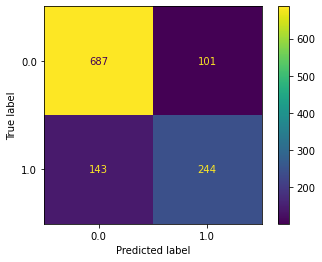

In [185]:
plot_confusion_matrix(clf, X_test, y_test)

In [186]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8455629664607354

In [100]:
#import pickle
#with open('model1.pkl', 'wb') as f:
#    pickle.dump(clf, f)

In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.1min finished
E:\Users\juanb\anaconda3\envs\bavaria\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [61]:
import copy

In [62]:
best_rf = copy.deepcopy(rf_random.best_estimator_)

In [63]:
best_rf.score(X_train, y_train)

0.9613943028485757

In [64]:
best_rf.score(X_test, y_test)

0.7716141929035483

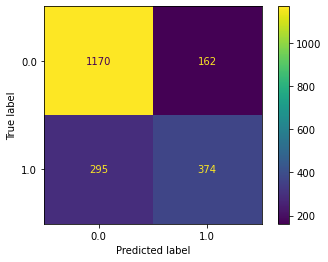

In [65]:
plot_confusion_matrix(best_rf, X_test, y_test)

In [66]:
roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

0.8204157071870077

### SVMC

In [37]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))

In [38]:
clf2.fit(X_train, y_train)

E:\Users\juanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [39]:
clf2.score(X_test, y_test)

0.7846808510638298

In [40]:
clf2.score(X_train, y_train)

0.8062180579216355

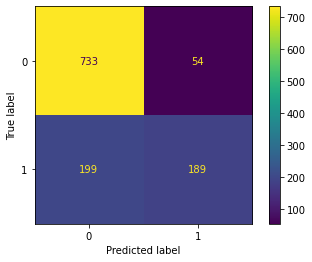

In [41]:
plot_confusion_matrix(clf2, X_test, y_test)

In [42]:
roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1])

0.8379416156879184

### XgBoost

In [47]:
param = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":2}
num_round = 100
train_mat = xgb.DMatrix(X_train, label=y_train)
test_mat = xgb.DMatrix(X_test, label=y_test)
all_mat = xgb.DMatrix(df_c.drop(columns=["Prod1"]), label=df_c[["Prod1"]])

evaluation = [(test_mat, "eval"), (train_mat, "train")]

In [48]:
bst = xgb.train(param, train_mat, num_round, evaluation)

[0]	eval-error:0.27636	train-error:0.27049
[1]	eval-error:0.24938	train-error:0.24838
[2]	eval-error:0.24088	train-error:0.24000
[3]	eval-error:0.22989	train-error:0.23676
[4]	eval-error:0.23538	train-error:0.23051
[5]	eval-error:0.23288	train-error:0.22926
[6]	eval-error:0.23039	train-error:0.22926
[7]	eval-error:0.22839	train-error:0.22639
[8]	eval-error:0.22739	train-error:0.22564
[9]	eval-error:0.22839	train-error:0.22426
[10]	eval-error:0.22939	train-error:0.22364
[11]	eval-error:0.22889	train-error:0.22064
[12]	eval-error:0.22639	train-error:0.22076
[13]	eval-error:0.22389	train-error:0.22076
[14]	eval-error:0.22589	train-error:0.21976
[15]	eval-error:0.22639	train-error:0.22026
[16]	eval-error:0.22339	train-error:0.21877
[17]	eval-error:0.22439	train-error:0.21752
[18]	eval-error:0.22539	train-error:0.21802
[19]	eval-error:0.22389	train-error:0.21852
[20]	eval-error:0.22539	train-error:0.21677
[21]	eval-error:0.21989	train-error:0.21602
[22]	eval-error:0.22039	train-error:0.2153

In [49]:
clf3 = xgb.XGBModel(**param)

In [50]:
clf3.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.62525	validation_1-logloss:0.62524
[1]	validation_0-logloss:0.58259	validation_1-logloss:0.58547
[2]	validation_0-logloss:0.55396	validation_1-logloss:0.55873
[3]	validation_0-logloss:0.53500	validation_1-logloss:0.53929
[4]	validation_0-logloss:0.52082	validation_1-logloss:0.52618
[5]	validation_0-logloss:0.51081	validation_1-logloss:0.51840
[6]	validation_0-logloss:0.50351	validation_1-logloss:0.51080
[7]	validation_0-logloss:0.49672	validation_1-logloss:0.50544
[8]	validation_0-logloss:0.49199	validation_1-logloss:0.50192
[9]	validation_0-logloss:0.48793	validation_1-logloss:0.49797
[10]	validation_0-logloss:0.48478	validation_1-logloss:0.49543
[11]	validation_0-logloss:0.48196	validation_1-logloss:0.49328
[12]	validation_0-logloss:0.47962	validation_1-logloss:0.49122
[13]	validation_0-logloss:0.47763	validation_1-logloss:0.48898
[14]	validation_0-logloss:0.47569	validation_1-logloss:0.48763
[15]	validation_0-logloss:0.47423	validation_1-logloss:0.48622
[1

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, gpu_id=-1,
         interaction_constraints='', learning_rate=0.300000012,
         max_delta_step=0, max_depth=2, min_child_weight=1,
         monotone_constraints='()', n_jobs=2, nthread=2, num_parallel_tree=1,
         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=1)

In [51]:
roc_auc_score(y_test, bst.predict(test_mat))

0.8220608500877559

In [52]:
roc_auc_score(y_test, clf3.predict(X_test))

0.8220608500877559

No Skill: ROC AUC=0.500
xgboost: ROC AUC=0.822
randomForest: ROC AUC=0.811


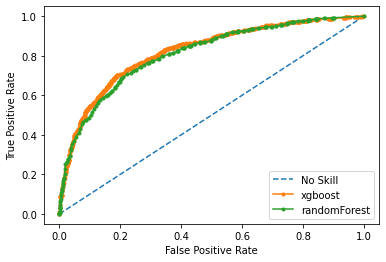

In [53]:
# roc curve and auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rf_probs = clf.predict_proba(X_test)[:, 1]
xg_probs = clf3.predict(X_test)
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xg_auc = roc_auc_score(y_test, xg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('xgboost: ROC AUC=%.3f' % (xg_auc))
print('randomForest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xg_fpr, xg_tpr, marker='.', label='xgboost')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='randomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [187]:
clf.fit(X, Y)

<ipython-input-187-bb7a7515ddfc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, Y)


RandomForestClassifier()

In [68]:
best_rf.fit(X, Y)

<ipython-input-68-18f6596e70c4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X, Y)


RandomForestClassifier(max_depth=70, min_samples_leaf=2, n_estimators=1400)

In [188]:
df_c["predicted"] = clf.predict_proba(df_c.drop(columns=["Prod1"]))[:, 1]
df_c

,Prod1,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt84,nr_ProdOt85,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93,nr_ProdOt96,predicted
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.094400,0.226087,0.152896,1,0.000000,0.0,0.000000,0.136927,0.019561,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.25
4539,0.0,0.252685,0.151403,0.152896,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
4546,1.0,0.252685,0.241718,0.188505,1,0.000000,0.0,0.056114,0.019561,0.000000,...,0.0,0.0,552.286164,0.0,1692.713615,0.0,0.0,0.0,0.0,0.88
3092,0.0,0.116981,0.123950,0.110782,1,0.033721,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.49
4535,0.0,0.252685,0.151403,0.152896,1,0.000000,0.0,0.000000,0.039122,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.037300,0.151403,0.188505,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
18878,0.0,0.139535,0.142857,0.152896,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
18996,0.0,0.139535,0.159398,0.188505,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00


In [189]:
df_a = df_test.copy().set_index("Cliente")
df_a["Marca1"] = df_c[["predicted"]]
df_a

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.25,0.422045,0.528871,0.620000,0.610000
12,0.26,0.750508,0.545422,0.120000,0.030000
14,0.75,0.178546,0.553130,0.060000,0.060000
15,0.79,0.178047,0.302522,0.300000,0.330000
18,0.29,0.216901,0.303468,0.090000,0.180000
...,...,...,...,...,...
20186,0.00,0.147069,0.159453,0.630000,0.590000
20261,0.04,0.049379,0.046851,0.900000,0.900000
20309,0.00,0.152190,0.085601,0.489594,0.418825


In [99]:
df_a.to_csv(fr"{cwd}\Input3_clientes_test_4.csv", sep = ";")

In [190]:
df_a.to_csv(fr"{cwd}\completo21.csv", sep = ",")

In [194]:
model = None
with open('model1.pkl', 'rb') as f:
    model = pickle.load(f)


In [205]:
df_prod_t
df_c2 = df_prod_t[df_prod_t.index.isin(df_test["Cliente"])].copy()


In [210]:
df_c2["predicted"] = model.predict_proba(df_c2.loc[:, df_c.drop(columns=["Prod1", "predicted"]).columns])[:, 1]
#df_c  model.predict_proba(df_c.drop(columns=["Prod1"]))[:, 1]

In [212]:
df_b = df_test.copy().set_index("Cliente")
df_b["Marca1"] = df_c2[["predicted"]]
df_b

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.61,0.422045,0.528871,0.620000,0.610000
12,0.56,0.750508,0.545422,0.120000,0.030000
14,0.59,0.178546,0.553130,0.060000,0.060000
15,0.80,0.178047,0.302522,0.300000,0.330000
18,0.68,0.216901,0.303468,0.090000,0.180000
...,...,...,...,...,...
20186,0.00,0.147069,0.159453,0.630000,0.590000
20261,0.07,0.049379,0.046851,0.900000,0.900000
20309,0.11,0.152190,0.085601,0.489594,0.418825


In [213]:
df_b.to_csv(fr"{cwd}\completo25.csv", sep = ",")

In [218]:
a = list(zip(df_c.drop(columns=["Prod1", "predicted"]).columns, model.feature_importances_))
a.sort(key=lambda x:x[1], reverse=True)
a

[('nr_Prod1', 0.054324260263015726),
 ('Volumen_Prod1', 0.041753640461128574),
 ('Volumen_ProdOt7', 0.025563178391439033),
 ('nr_ProdOt7', 0.023493923804690064),
 ('nr_ProdOt13', 0.022220796844385656),
 ('Volumen_ProdOt6', 0.022021951440997146),
 ('nr_ProdOt8', 0.020991032266263178),
 ('nr_ProdOt6', 0.020753845903564137),
 ('nr_ProdOt27', 0.020310536868812026),
 ('nr_ProdOt4', 0.020220885344565093),
 ('Volumen_ProdOt13', 0.018251938570301017),
 ('disc_ProdOt6', 0.017370212220343087),
 ('Volumen_ProdOt4', 0.016615465796004866),
 ('Volumen_ProdOt39', 0.015794002681303203),
 ('nr_ProdOt39', 0.015408479890370953),
 ('disc_ProdOt7', 0.015179196617991449),
 ('nr_Prod3', 0.014569239398413399),
 ('Volumen_ProdOt27', 0.013975134142453024),
 ('Volumen_ProdOt8', 0.013857820529640274),
 ('Volumen_Prod3', 0.013669507074278418),
 ('nr_ProdOt5', 0.013053616937029172),
 ('disc_ProdOt8', 0.012840364833893914),
 ('nr_ProdOt9', 0.01272762064000437),
 ('nr_ProdOt30', 0.012522493219077004),
 ('Volumen_Prod